# Capstone Project- Car accident severity
## Applied Data Science Capstone by IBM/Coursera
by Aliah H. 

## Table of Contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [References](#references)

# Introduction / Business Problem

According to the Washington State Department of Transportation 2015 Annual Collision Summary, a crash occured every 4.5 minutes. Devastatingly, a person died in a crash every 16 hours and a person was injured in a crash every 11 minutes . There were a total of 117,053 collisions with 499 of them resulted in fatality and 1752 of them with serious injuries [1]. In 2018 alone, there were 10, 249 police reported collisions on Seattle street [2].

Meanwhile, the US Department of Transportation's National Highway Traffic Safety Administration (NHTSA) motor vehicle crashes imposed USD 836 billion in economic cost and societal harm on the country in 2010. And for the 2017 financial year, NHTSA requests USD 1.181 billion to effectively continue its mission of ensuring safer drivers, safer cars, and safer roads [3].

In this project, we will try to predict the severity of an accident based on road and weather conditions. Specifically, this report will be targeted to stakeholders interested in developing an app or system that could alert and warn drivers about the potential risk they are facing when driving. 


# Data

The dataset used for this project is based on reported car collisions in Seattle, Washington from 2004 to 2020. The dataset lists the severity of each car accidents along with the time and conditions under which each accident occurred. There are 38 attributes with 194673 entries included in the raw dataset. There is also a metadata document provided along with the dataset that describes each attribute.  



# Methodology

**Machine learning method**

In this project, two classifier models were built using Decision Tree and K Nearest Neighbour. Both models are built, analysed and visualised using Python libraries sklearn, pandas, numpy and matplotlib. 

**Exploratory data analysis** 

To get to know the data, the shape, the name and the datatype of the attributes were identified using pandas library. Then, the dataset was checked for missing values and the target label was checked for count balance. 

**Data preparation**

To prepare the dataset for modelling, attributes identified with more than 50% missing values were dropped. Further, only entries with missing values were dropped for the remaining attributes. The minority class for the target label was then upsampled to balance the dataset. 
The identified categorical attributes were then converted into numerical using <html>LabelEncoder</html>. 

**Modelling, Prediction and Analysis**
The balanced dataset was split into training and testing datasets. Both models were built using the train dataset and predictions were carried out using the test dataset. Both models were then analysed for accuracy by calculating the accuracy and F1 score. 



# Result

## Exploratory Data Analysis

For this step, I did some simple exploration to identify missing values and the datatypes of the attributes. The raw data has 38 attributes and 19,4673 entries. There were 6 attributes with more than 50% missing values in the dataset. These attributes were dropped from the dataset. For the remaining attributes, only entries with missing values were ddropped. Majority of the remaining attributes are numerical whereas 7 attributes were found numerical. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Data-collisions.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

### Dropping columns

There are 38 attributes in the data. In order to choose which features to use for modelling later on, we could first identify the columns that would not be useful for the analysis. 

In [5]:
# Checking for missing values

missing_val=pd.DataFrame({'Null':df.isnull().sum()})
missing_val.sort_values(by='Null', ascending=False)

,Null
PEDROWNOTGRNT,190006
EXCEPTRSNDESC,189035
SPEEDING,185340
INATTENTIONIND,164868
INTKEY,129603
EXCEPTRSNCODE,109862
SDOTCOLNUM,79737
JUNCTIONTYPE,6329
X,5334
Y,5334


* **PEDROWNOTGRNT** : Whether or not the pedestrian right of way was not granted. (Y/N) 
* **EXCEPTRSNDESC** : No description provided
* **SPEEDING** : Whether or not speeding was a factor in the collision. (Y/N)
* **INATTENTIONIND** : Whether or not collision was due to inattention. (Y/N)
* **INTKEY** : Key that corresponds to the intersection associated with a collision
* **EXCEPTRSNCODE** : No description provided
* **SDOTCOLNUM**: A number given to the collision by SDOT.

The top 6 attributes has more than 50% missing values, therefore would not be useful if included in the data for modelling. Also preliminarily, four more additional attributes identified ('REPORTN0', 'SDOTCOLNUM','X', 'Y') to would not be contributing to the analysis, thus dropped. These attributes were the report ID and the coordinates for the accident. 

In [6]:
df.drop(['PEDROWNOTGRNT','SPEEDING','EXCEPTRSNDESC','INATTENTIONIND', 'INTKEY', 'EXCEPTRSNCODE', 'SDOTCOLNUM', 'REPORTNO', 'X', 'Y'], axis=1, inplace=True)

In [7]:
df.shape

(194673, 28)

In [8]:
# Checking for missing values again 

missing_val=pd.DataFrame({'Null':df.isnull().sum()})
missing_val.sort_values(by='Null', ascending=False)

,Null
JUNCTIONTYPE,6329
LIGHTCOND,5170
WEATHER,5081
ROADCOND,5012
ST_COLDESC,4904
COLLISIONTYPE,4904
UNDERINFL,4884
LOCATION,2677
ADDRTYPE,1926
ST_COLCODE,18


Removing more columns that are not contributing or too complex. For example, the attribute 'LOCATION' is a categorical data with more than 10,000 different entries and 'SEVERITYDESC' attribute is redundant.

In [9]:
df.drop(['SEVERITYCODE.1','INCDTTM','SDOT_COLDESC','JUNCTIONTYPE','HITPARKEDCAR', 'ST_COLDESC','OBJECTID', 'INCDATE', 'LOCATION', 'SEVERITYDESC', 'STATUS'], axis=1,inplace=True)
df.head()

,SEVERITYCODE,INCKEY,COLDETKEY,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY
0,2,1307,1307,Intersection,Angles,2,0,0,2,11,N,Overcast,Wet,Daylight,10,0,0
1,1,52200,52200,Block,Sideswipe,2,0,0,2,16,0,Raining,Wet,Dark - Street Lights On,11,0,0
2,1,26700,26700,Block,Parked Car,4,0,0,3,14,0,Overcast,Dry,Daylight,32,0,0
3,1,1144,1144,Block,Other,3,0,0,3,11,N,Clear,Dry,Daylight,23,0,0
4,2,17700,17700,Intersection,Angles,2,0,0,2,11,0,Raining,Wet,Daylight,10,0,0


In [10]:
df.dropna(axis=0, subset=['WEATHER', 'ROADCOND', 'LIGHTCOND'], inplace=True)
df.shape

(189337, 17)

In [11]:
# Checking for missing values again 

missing_val=pd.DataFrame({'Null':df.isnull().sum()})
missing_val.sort_values(by='Null', ascending=False)

,Null
ADDRTYPE,1812
COLLISIONTYPE,21
ST_COLCODE,18
SEVERITYCODE,0
UNDERINFL,0
SEGLANEKEY,0
LIGHTCOND,0
ROADCOND,0
WEATHER,0
VEHCOUNT,0


In [12]:
df.dropna(axis=0, subset=['ADDRTYPE','COLLISIONTYPE', 'ST_COLCODE'], inplace=True)
df.shape

(187504, 17)

In [13]:
# Checking for missing values again 

missing_val=pd.DataFrame({'Null':df.isnull().sum()})
missing_val.sort_values(by='Null', ascending=False)

,Null
SEVERITYCODE,0
SDOT_COLCODE,0
SEGLANEKEY,0
ST_COLCODE,0
LIGHTCOND,0
ROADCOND,0
WEATHER,0
UNDERINFL,0
VEHCOUNT,0
INCKEY,0


## Data Preparation
### Target label

The target label is 'SEVERITYCODE/' and the description is listed in 'SEVERITYDESC'.  

The 'SEVERITYCODE' attribute lists the code that corresponds to the severity of the collision: 
* 3  - fatality
* 2b - serious injury
* 2  - injury
* 1  - prop damage
* 0  - unknown

In [14]:
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,130634
2,56870


In [15]:
check_for_nan=df['SEVERITYCODE'].isnull().values.any()
print(check_for_nan)

False


The data is not balanced. 

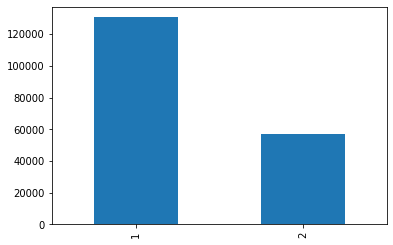

In [16]:
df['SEVERITYCODE'].value_counts().plot(kind='bar')

### Balancing the dataset by upsampling minority class

In [17]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=130634,    # to match majority class in df2 (NaN removed)
                                 random_state=4) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.SEVERITYCODE.value_counts()


2    130634
1    130634
Name: SEVERITYCODE, dtype: int64

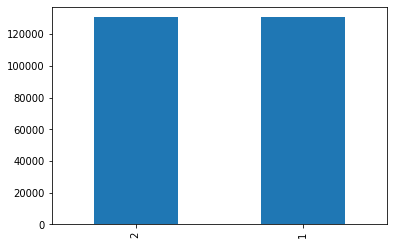

In [18]:
df_upsampled['SEVERITYCODE'].value_counts().plot(kind='bar')

In [19]:
df_upsampled.shape

(261268, 17)

standardizing values for categorical columns

In [20]:
df_upsampled['UNDERINFL'].value_counts().to_frame()

,UNDERINFL
N,138460
0,109098
Y,7609
1,6101


In [21]:
df_upsampled['UNDERINFL'] = df_upsampled['UNDERINFL'].replace(['N','Y'],['0','1'])

In [22]:
df_upsampled['UNDERINFL'].value_counts().to_frame()

,UNDERINFL
0,247558
1,13710


In [23]:
df_upsampled.columns

Index(['SEVERITYCODE', 'INCKEY', 'COLDETKEY', 'ADDRTYPE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'SEGLANEKEY', 'CROSSWALKKEY'],
      dtype='object')

In [24]:
df_upsampled.shape

(261268, 17)

In [25]:
print(df_upsampled.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261268 entries, 1 to 85792
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   261268 non-null  int64 
 1   INCKEY         261268 non-null  int64 
 2   COLDETKEY      261268 non-null  int64 
 3   ADDRTYPE       261268 non-null  object
 4   COLLISIONTYPE  261268 non-null  object
 5   PERSONCOUNT    261268 non-null  int64 
 6   PEDCOUNT       261268 non-null  int64 
 7   PEDCYLCOUNT    261268 non-null  int64 
 8   VEHCOUNT       261268 non-null  int64 
 9   SDOT_COLCODE   261268 non-null  int64 
 10  UNDERINFL      261268 non-null  object
 11  WEATHER        261268 non-null  object
 12  ROADCOND       261268 non-null  object
 13  LIGHTCOND      261268 non-null  object
 14  ST_COLCODE     261268 non-null  object
 15  SEGLANEKEY     261268 non-null  int64 
 16  CROSSWALKKEY   261268 non-null  int64 
dtypes: int64(10), object(7)
memory usage: 35.9+ MB
No

In [26]:
#To look at all categorical data
cat_df_upsampled = df_upsampled.select_dtypes(include=['object']).copy()

In [27]:
cat_df_upsampled.head()

,ADDRTYPE,COLLISIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
1,Block,Sideswipe,0,Raining,Wet,Dark - Street Lights On,11
2,Block,Parked Car,0,Overcast,Dry,Daylight,32
3,Block,Other,0,Clear,Dry,Daylight,23
5,Intersection,Angles,0,Clear,Dry,Daylight,10
6,Intersection,Angles,0,Raining,Wet,Daylight,10


In [28]:
cat_df_upsampled['ADDRTYPE'].value_counts().to_frame()

,ADDRTYPE
Block,161504
Intersection,98925
Alley,839


In [29]:
cat_df_upsampled['COLLISIONTYPE'].value_counts()


Rear Ended    52569
Angles        52363
Parked Car    50068
Other         31266
Sideswipe     21692
Left Turn     20434
Pedestrian    14299
Cycles        11652
Right Turn     3768
Head On        3157
Name: COLLISIONTYPE, dtype: int64

### Setting up the dataset

Some preprocessing to generate feature set, X. All categorical data from the upsampled dataframe was converted into numerical using LabelEncoder. The dataset was split into training and testing dataset with a 70:30 ratio. 

In [30]:
df_upsampled.columns

Index(['SEVERITYCODE', 'INCKEY', 'COLDETKEY', 'ADDRTYPE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'SEGLANEKEY', 'CROSSWALKKEY'],
      dtype='object')

In [31]:
X = df_upsampled[['INCKEY', 'COLDETKEY', 'ADDRTYPE',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'SDOT_COLCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY']].values

y = df_upsampled['SEVERITYCODE']

In [32]:
X.shape


(261268, 16)

In [33]:
#Encoding categorical data 
from sklearn import preprocessing


le_addrtype = preprocessing.LabelEncoder()
le_addrtype.fit(['Block', 'Intersection', 'Alley'])
X[:,2] = le_addrtype.transform(X[:,2]) 

le_colltype=preprocessing.LabelEncoder()
le_colltype.fit(['Rear Ended','Angles','Parked Car','Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On'])
X[:,3]= le_colltype.transform(X[:,3])

le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Clear','Raining','Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain','Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'])
#le_weather.fit(df_upsampled['WEATHER'].values)
X[:,10] = le_weather.transform(X[:,10]) 


le_roadcond = preprocessing.LabelEncoder()
le_roadcond.fit([ 'Dry', 'Wet', 'Unknown', 'Ice', 'Snow/Slush', 'Other', 'Standing Water', 'Oil', 'Sand/Mud/Dirt'])
X[:,11] = le_roadcond.transform(X[:,11])


le_lightcond = preprocessing.LabelEncoder()
le_lightcond.fit([ 'Daylight', 'Dark - Street Lights On', 'Unknown','Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off','Other','Dark - Unknown Lighting'])
X[:,12] = le_lightcond.transform(X[:,12]) 


In [34]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Decision Tree Classifier

### Modelling

A decision tree was built using the DecisionTreeClassifier function from sklearn's library. The maximum depth for tree was set at 10 and the tree was trained using the training dataset. 

In [48]:
from sklearn.tree import DecisionTreeClassifier

SeverityTree = DecisionTreeClassifier(max_depth = 10)
SeverityTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
SeverityTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction

The trained model was then used to predict collision severity using the testing dataset. 

In [50]:
predTree = SeverityTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

[2 1 1 1 2]
170576    1
77818     1
49356     2
126206    2
21469     2
Name: SEVERITYCODE, dtype: int64


### Evaluation

The accuracy score for the tree was 0.73, which was good. Top 3 factors predicting severity is the number of pedestrian, number of cyclists and number of individuals likely to involve in the collision. 

In [51]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7239126829206057


In [52]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [55]:
import sklearn.datasets as datasets
from sklearn.tree import plot_tree

# check for the sklearn version, it has to be 0.21
import sklearn
print(sklearn.__version__)

0.22.1


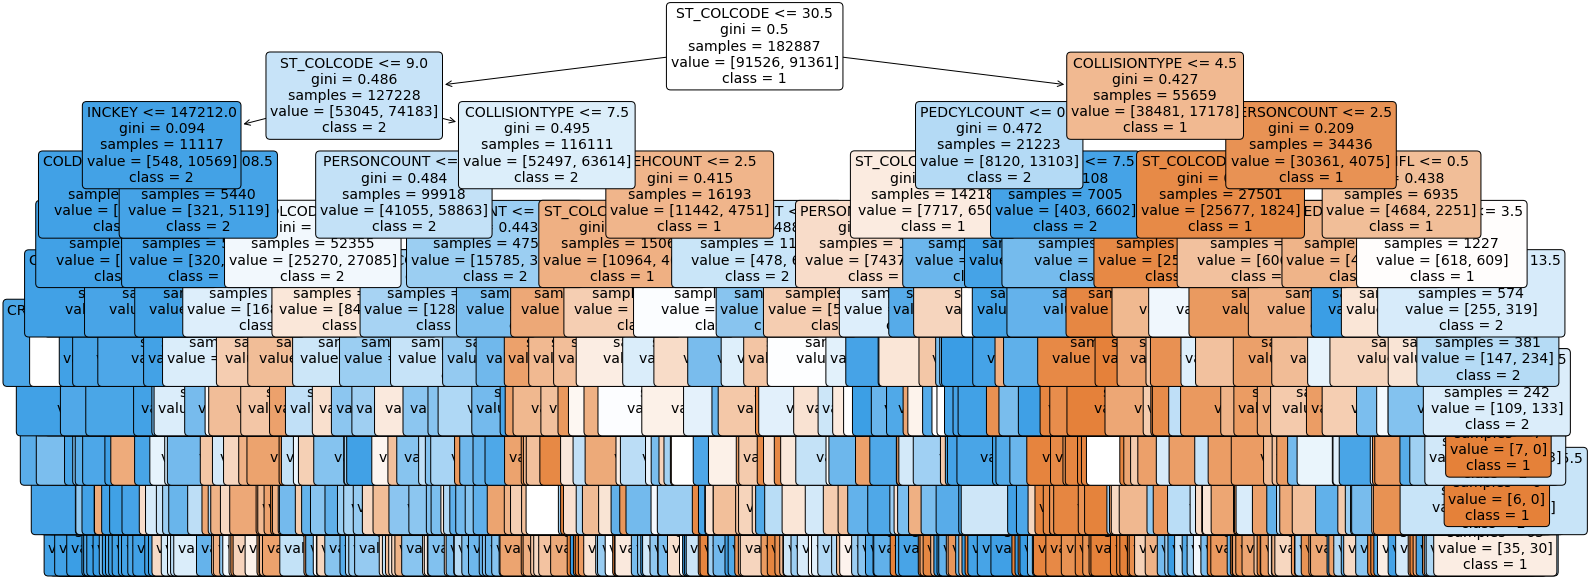

In [57]:
# Visualisation
plt.figure(figsize=(25,10))
a = plot_tree(SeverityTree, 
              feature_names=['INCKEY', 'COLDETKEY', 'ADDRTYPE',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'SDOT_COLCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY'], 
              class_names=['1', '2'],
              filled=True, 
              rounded=True, 
              fontsize=14)

# KNN Classifier

### Modelling

A KNN model was built using the KNeighborsClassifier function from sklearn's library. The accuracy of the model was tested against a range of number of k to identify the best k. The best accuracy was 0.8 with k=1. 

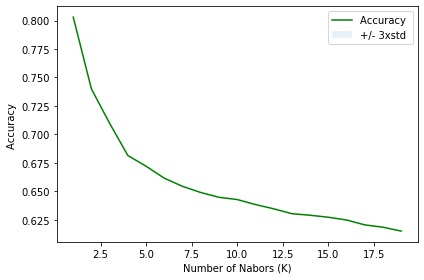

The best accuracy was with 0.8030390017989053 with k= 1


In [45]:
from sklearn.neighbors import KNeighborsClassifier #to build model
from sklearn import metrics #to test accuracy

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    KNNmodel = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=KNNmodel.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

#Visualize the Ks   
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [46]:
# starting with k=5 as recommended above 
classifier = KNeighborsClassifier(n_neighbors=1).fit(X_trainset, y_trainset)  # the model

y_pred = classifier.predict(X_testset) #predict y (the diagnosis)

w = metrics.accuracy_score(y_testset, y_pred) # get accuracy score

print("accuracy score:", w)

accuracy score: 0.8030390017989053


### Evaluation

The accuracy score for the best KNN model was 0.80 and the F1 score was 0.78 and 0.82 for predicting 'Property Damage only' and 'Injury' collisions. These scores are higher than of the Decision Tree demonstrating that for this dataset, the KNN model performs better. 

              precision    recall  f1-score   support

           1       0.86      0.72      0.78     39108
           2       0.76      0.89      0.82     39273

    accuracy                           0.80     78381
   macro avg       0.81      0.80      0.80     78381
weighted avg       0.81      0.80      0.80     78381



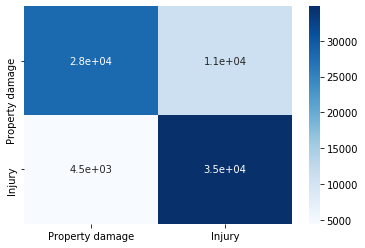

In [316]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cf_matrix=confusion_matrix(y_testset, y_pred)

cat = ["Property damage", "Injury"]
sns.heatmap(cf_matrix, annot=True, xticklabels=cat, yticklabels=cat, cmap='Blues')

print(classification_report(y_testset, y_pred))

The model is optimised at k=1, at which the model correctly predicts accident severity code 1 and 2- 86% and 76% of the time, respectively. The F1 scores of the two accident outcomes are 0.78 and 0.82.

# References 

1. Washington State Department of Transportation 2015 Annual Collision Summary. https://wsdot.wa.gov/mapsdata/crash/pdf/2015_Annual_Collision_Summary.pdf

2. Seattle Department of Transportation 2019 Traffic Report. https://www.seattle.gov/Documents/Departments/SDOT/VisionZero/2019_Traffic_Report.pdf

3. National Highway Traffic Safety Administration (NHTSA) Budget Estimates (Fiscal Year 2017). https://www.nhtsa.gov/sites/nhtsa.dot.gov/files/fy2017-nhtsa_cbj_final_02_2016.pdf
